In [1]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator

In [2]:
def ket(x: list):
    return np.array(x).reshape(-1, 1).astype(np.complex128)


state00 = ket([1, 0, 0, 0])
state11 = ket([0, 0, 0, 1])

phi_I = (state00 + state11) / np.sqrt(2)
phi_X = np.dot(np.kron(np.eye(2), np.array([[0, 1], [1, 0]])), phi_I)
phi_Z = np.dot(np.kron(np.eye(2), np.array([[1, 0], [0, -1]])), phi_I)
phi_XZ = np.dot(
    np.kron(np.eye(2), np.dot(np.array([[0, 1], [1, 0]]), np.array([[1, 0], [0, -1]]))),
    phi_I,
)

In [3]:
# ? question, how to represent the 1,3 and 2,4 location?
def phi_U(U: np.matrix):
    return np.dot(np.kron(np.eye(4), U), np.kron(phi_I, phi_I))


# take a smallest example, 2 qubit and 1 2-qubit gate
# total used qubits are 2Dn + n qubts, latter n for input
X = np.array([[0, 1], [1, 0]])
U = np.kron(X, X)

# kron the input state and the phi_U to get the PEPS
phi_W = np.kron(state00, phi_U(U))

def project_itself(x: np.matrix):
    return np.dot(x, x.reshape(1, -1))


In [4]:
eps = 1

# simply pick a perturbation
# the Q is different in paper and the talk
Q = project_itself(phi_I) + eps * (
    project_itself(phi_X) + project_itself(phi_Z) + project_itself(phi_XZ)
)

Q_map = Q
for _ in range(2):  # n * D -> 2 * 1
    Q_map = np.kron(Q_map, Q)

psi_W = np.dot(Q_map, phi_W)


# simply just move the eps to the front
lamb = eps * project_itself(phi_I) + (
    project_itself(phi_X) + project_itself(phi_Z) + project_itself(phi_XZ)
)

lamb4 = lamb
for _ in range(1):
    lamb4 = np.kron(lamb4, lamb)


def h_U(U: np.matrix):
    a = np.eye(2**4) - project_itself(phi_U(U))
    return np.dot(np.dot(lamb4, a), lamb4)


# H_prop = h_U(U)

# H_in = np.dot(np.dot(lamb4, np.diag([0, 1, 1, 2])), lamb4)

# H_prop + H_in

10 qubits


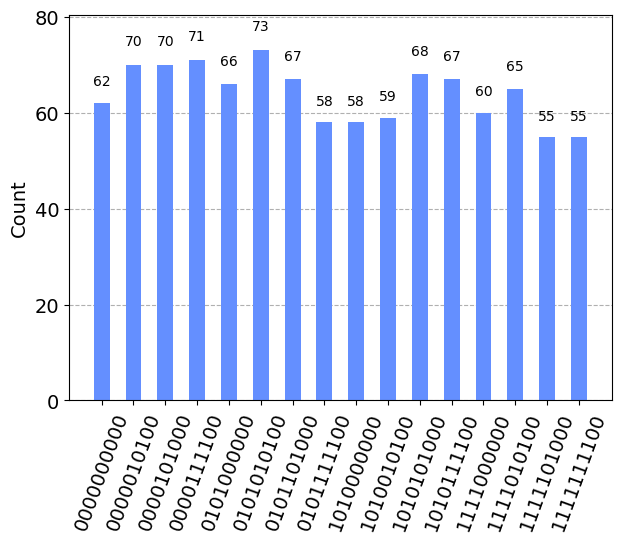

In [5]:
n = 2
D = 2

qc = QuantumCircuit(n * (2 * D + 1))

print(qc.num_qubits, "qubits")

for i in [2,3,6,7]:
    qc.h(i)
    qc.cx(i,i+2)

qc.measure_all()
plot_histogram(AerSimulator().run(qc).result().get_counts())